In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'SpotifyFeatures.csv'
data = pd.read_csv(file_path)
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Vizualiing the data

In [86]:
# visulize "duplicate songs"(same trackid = same song)
data['track_id'].value_counts()

track_id
6sVQNUvcVFTXvlk3ec0ngd    8
3R73Y7X53MIQZWnKloWq5i    8
6AIte2Iej1QKlaofpjCzW1    8
0UE0RhnRaEYsiYgXpyLoZc    8
3uSSjnDMmoyERaAK9KvpJR    8
                         ..
7LmNbXH6I25nuXUggjLtQH    1
0rPNR4Lj2phxGohb0uLcgY    1
1AZ56azOt9DiNANtFn4mVH    1
1TFtXn98AYLKym4IvBaQ24    1
3mNWzBMtDn6jW8y0u84lXE    1
Name: count, Length: 176774, dtype: int64

In [87]:
# display how many songs are "duplicated"(same trackid = same song) distrobution
data['track_id'].value_counts().value_counts()

count
1    141650
2     21871
3      8091
4      3374
5      1300
6       358
7       124
8         6
Name: count, dtype: int64

In [88]:
# Sample to Understand why there are duplicated songs
data[data['track_id'] == '6AIte2Iej1QKlaofpjCzW1']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
3108,Alternative,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,60,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
70327,Hip-Hop,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
78499,Children’s Music,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
94734,Indie,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
112832,Pop,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
116540,Rap,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
152747,R&B,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
192546,Soul,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245


In [89]:
# Visulize the distribution of songs into all genres
data['genre'].value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

In [90]:
data.describe() 

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


### Conclusions
- data has songs that are to long we want 8.3 minutes to be max and 1 minute to be min because we want to measure normal songs
- some attributes need to be transformed to numerical scale
- A capella is to small to be considered
- Children's Music and Children’s Music should be the same

### Data prepping steps
- remove song that are to long in duration songs longer than 500000 ms (500 seconds = 8.3 minutes)
- remove songs that are to short in duration songs shorter than 60000 ms (60 seconds = 1 minute)
- Remove A Capella songs due to being to small
- Combine union child genres into one genre Children's Music
- Split songs into it's genres
- Convert songs to flop or Bop based on popularity

### Create new attribute
- Genre count for each song with multilabeld genres

In [91]:
# Drop songs that are to long
data = data[data['duration_ms'] < 500000]
# Drop songs that are to short 
data = data[data['duration_ms'] > 60000]

# drop gernre a capella
data = data[data['genre'] != 'A Capella']

# Combine union child genres
data['genre'] = data['genre'].replace('Children’s Music', 'Children\'s Music')

# Create a new column for genre count
data['genre_count'] = data.groupby('track_id')['genre'].transform('count')

### Data Preprocessing
- Pitch preprocessing
- Time signature preprocessing
- Mode preprocessing (minor/major)
- Create datasets for each genre
- Flop or Bop labeling

In [92]:
# Function to convert pitch to number
def pitch_to_number(pitch):
    pitch_map = {
        'C': 0,
        'C#': 1, 'Db': 1,
        'D': 2,
        'D#': 3, 'Eb': 3,
        'E': 4, 'Fb': 4,
        'E#': 5, 'F': 5,
        'F#': 6, 'Gb': 6,
        'G': 7,
        'G#': 8, 'Ab': 8,
        'A': 9,
        'A#': 10, 'Bb': 10,
        'B': 11, 'Cb': 11
    }
    return pitch_map.get(pitch, None)

# Replace the pitch column with its numeric representation
# Assuming the column name in your DataFrame that contains pitch values is 'pitch_column'
data['key'] = data['key'].apply(pitch_to_number)

In [93]:
data['time_signature'] = data['time_signature'].apply(lambda x: x.split('/')[0])

In [94]:
# Convert the mode column to 1 for major and 0 for minor
data['mode'] = data['mode'].replace("Minor", 0)
data['mode'] = data['mode'].replace("Major", 1)

In [95]:
# Group by genre and calculate mean popularity
grouped = data.groupby('genre')
mean_popularity = grouped['popularity'].mean()
mean_popularity = mean_popularity.sort_values(ascending=False)

In [96]:
# Function to label rows as 'bop' or 'flop'
def label_popularity(row, mean_popularity):
    if row['popularity'] >= mean_popularity[row['genre']]:
        return 'bop'
    else:
        return 'flop'

# Apply the function to each row
data['popularity_label'] = data.apply(lambda row: label_popularity(row, mean_popularity), axis=1)

# Splitting the data into bop and flop, ensuring each genre is split 50/50
# This step might require adjusting the labels for genres with an odd number of entries
for genre in data['genre'].unique():
    genre_data = data[data['genre'] == genre]
    n = len(genre_data) // 2
    popular_indices = genre_data.nlargest(n, 'popularity').index
    nonpopular_indices = genre_data.nsmallest(n, 'popularity').index
    data.loc[popular_indices, 'popularity_label'] = 'bop'
    data.loc[nonpopular_indices, 'popularity_label'] = 'flop'

### Visualization so far
- Visualize the distribution of the target variable in terms of genres
- Visualize the distribution of bop and flop songs in terms of genres songs from spotify with a popularity over 50 and under 50
- Visualize the distribution of the new 50/50 split to balance the dataset

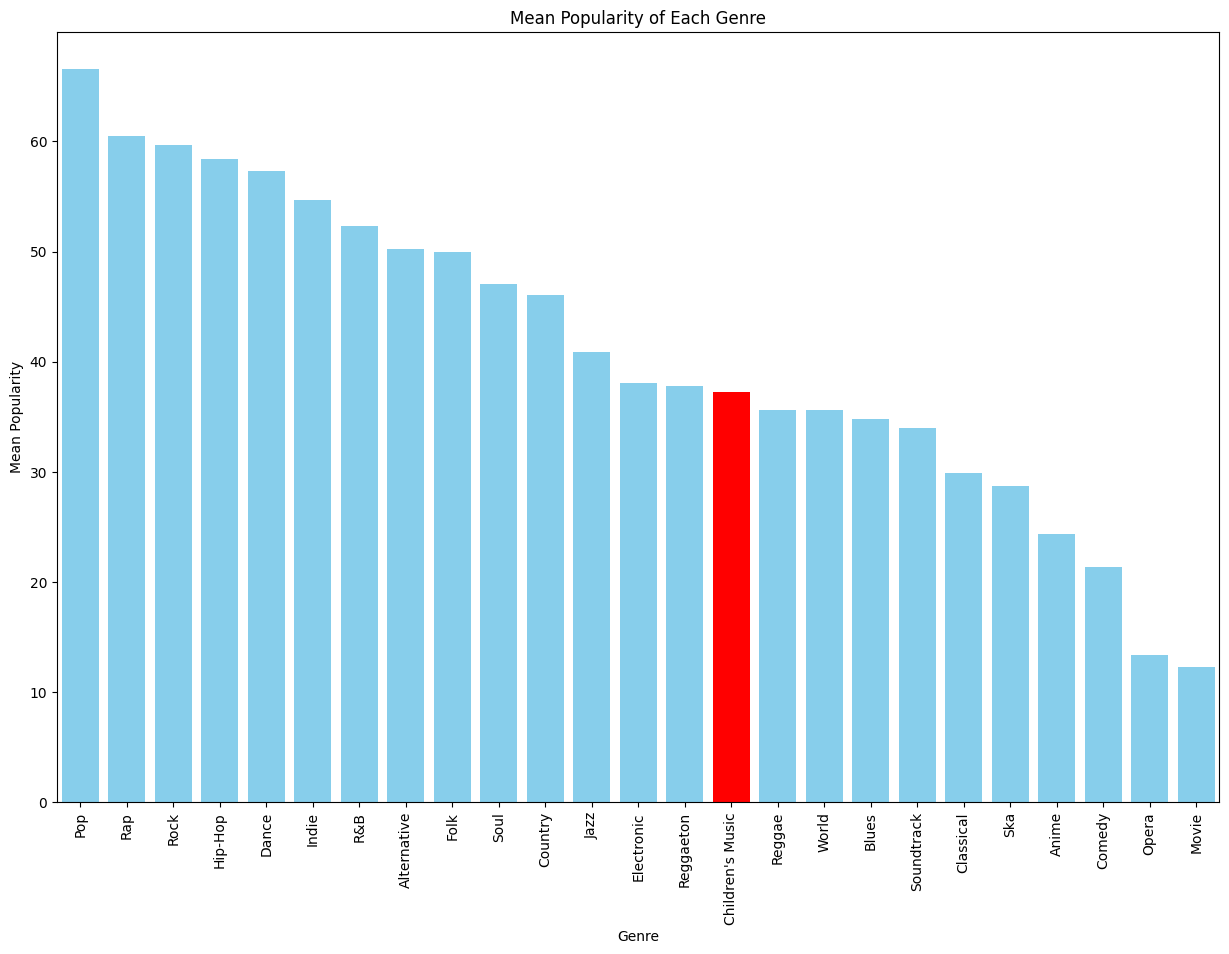

In [97]:
# plot the popularity of each genre and color children's music
mean_popularity.plot(kind='bar', figsize=(15, 10))
colors = ['red' if genre == 'Children\'s Music' else 'skyblue' for genre in mean_popularity.index]
plt.bar(mean_popularity.index, mean_popularity, color=colors)
plt.title('Mean Popularity of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.show()

25

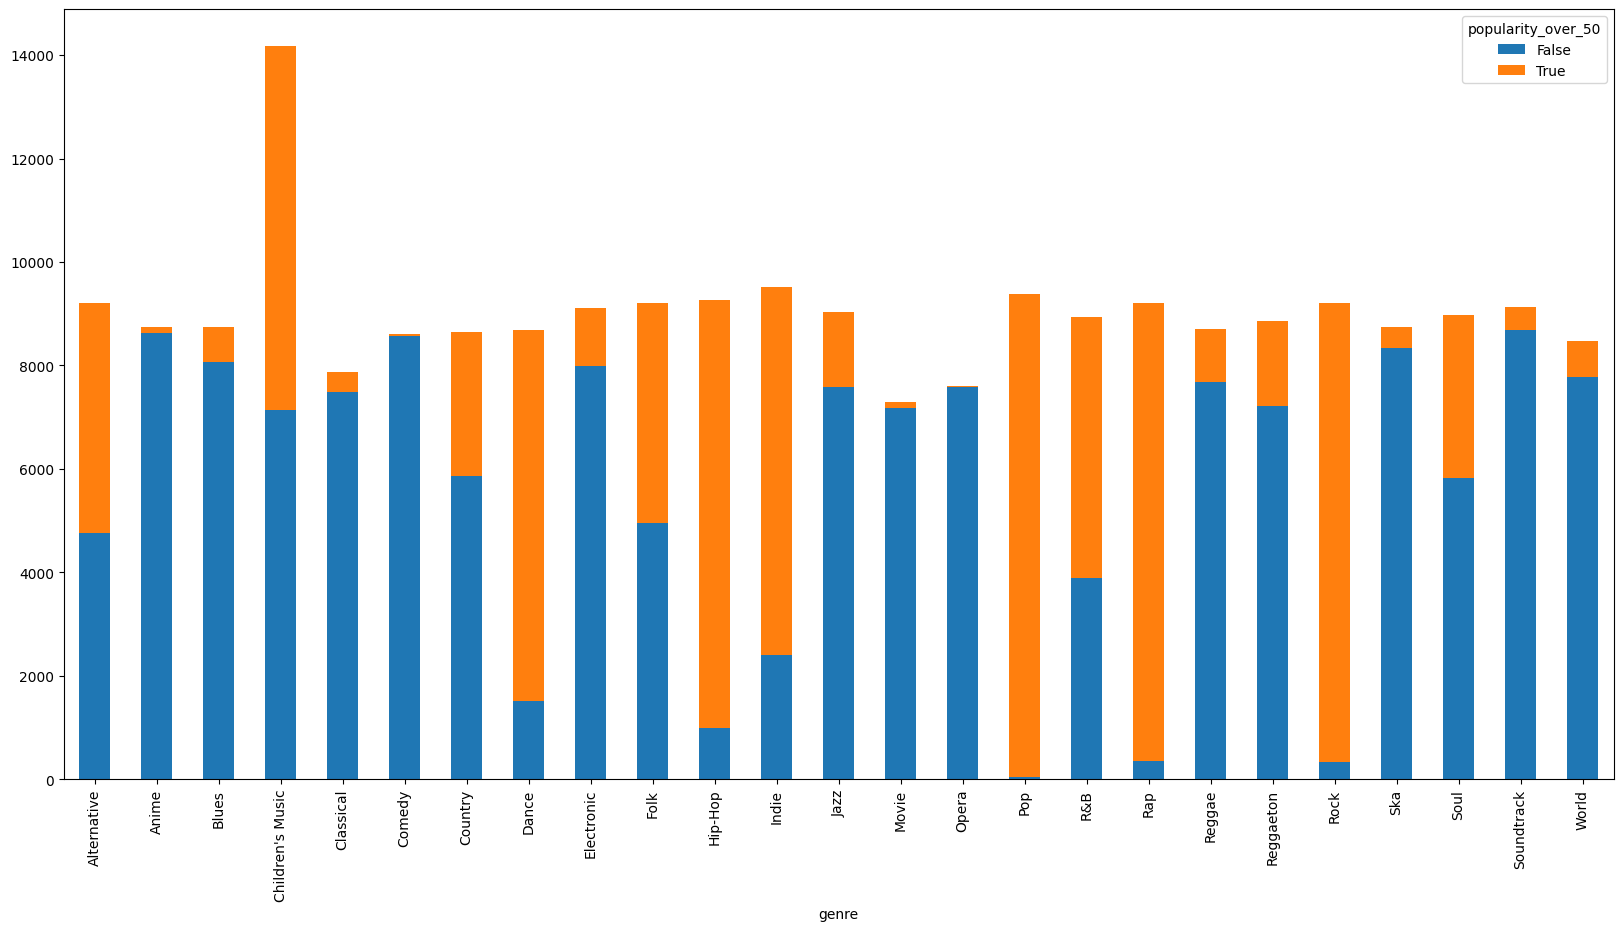

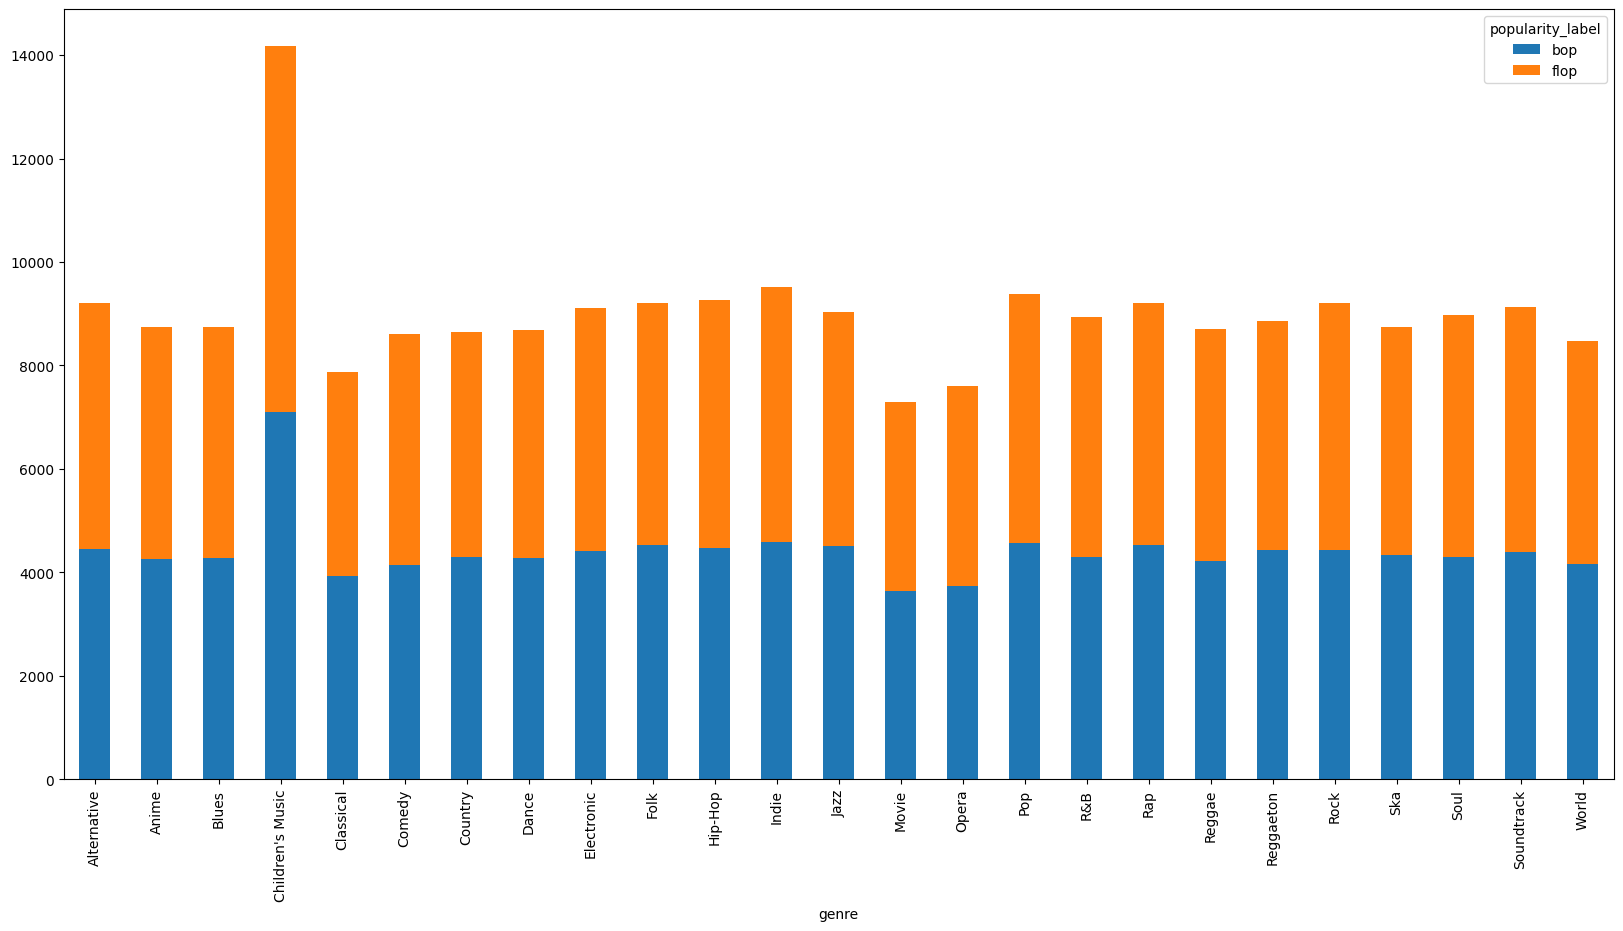

In [98]:
# create new column for popularity over 50
data['popularity_over_50'] = data['popularity'] >= 50
data['popularity_over_50'].value_counts()

# create table graph for every genre and popularity over 50
data.groupby(['genre', 'popularity_over_50']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))

# make one but with nonpopular and popular
data.groupby(['genre', 'popularity_label']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))

# Count how many genres there are
genre_count = data['genre'].nunique()
genre_count

### Comments on genre selection to further analyze
- By splitting the genres into it's own column we can now analyze the data in terms of genres this results in us having 25 datasets to analyze. To make the analysis easier to understand we will only analyze the biggest dataset children's music. 

In [99]:
childrens_music = data[data['genre'] == 'Children\'s Music']
childrens_music['popularity'].mean()

37.217489421720735

In [100]:
# Check for songs with same track_id to find duplicates
print(childrens_music[childrens_music['track_id'].duplicated()])

Empty DataFrame
Columns: [genre, artist_name, track_name, track_id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence, genre_count, popularity_label, popularity_over_50]
Index: []

[0 rows x 21 columns]


In [101]:
# Find songs with bad values - like the sample below
childrens_music[childrens_music['track_id'] == '7ARLbcqLgOrBI2JfzfKtHD']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_count,popularity_label,popularity_over_50
97932,Children's Music,New Medicine,Rich Kids - [Middle Cla$$ MIX],7ARLbcqLgOrBI2JfzfKtHD,51,0.0183,0.619,181907,0.936,0.0,...,0.361,-2.205,0,0.0739,108.011,4,0.739,2,bop,True


In [102]:
# Replace the $ in the track_name and artist_name columns with s
childrens_music.loc[:, 'track_name'] = childrens_music['track_name'].str.replace('$', 's')
childrens_music.loc[:, 'artist_name'] = childrens_music['artist_name'].str.replace('$', 's')

childrens_music[childrens_music['track_id'] == '7ARLbcqLgOrBI2JfzfKtHD']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_count,popularity_label,popularity_over_50
97932,Children's Music,New Medicine,Rich Kids - [Middle Class MIX],7ARLbcqLgOrBI2JfzfKtHD,51,0.0183,0.619,181907,0.936,0.0,...,0.361,-2.205,0,0.0739,108.011,4,0.739,2,bop,True


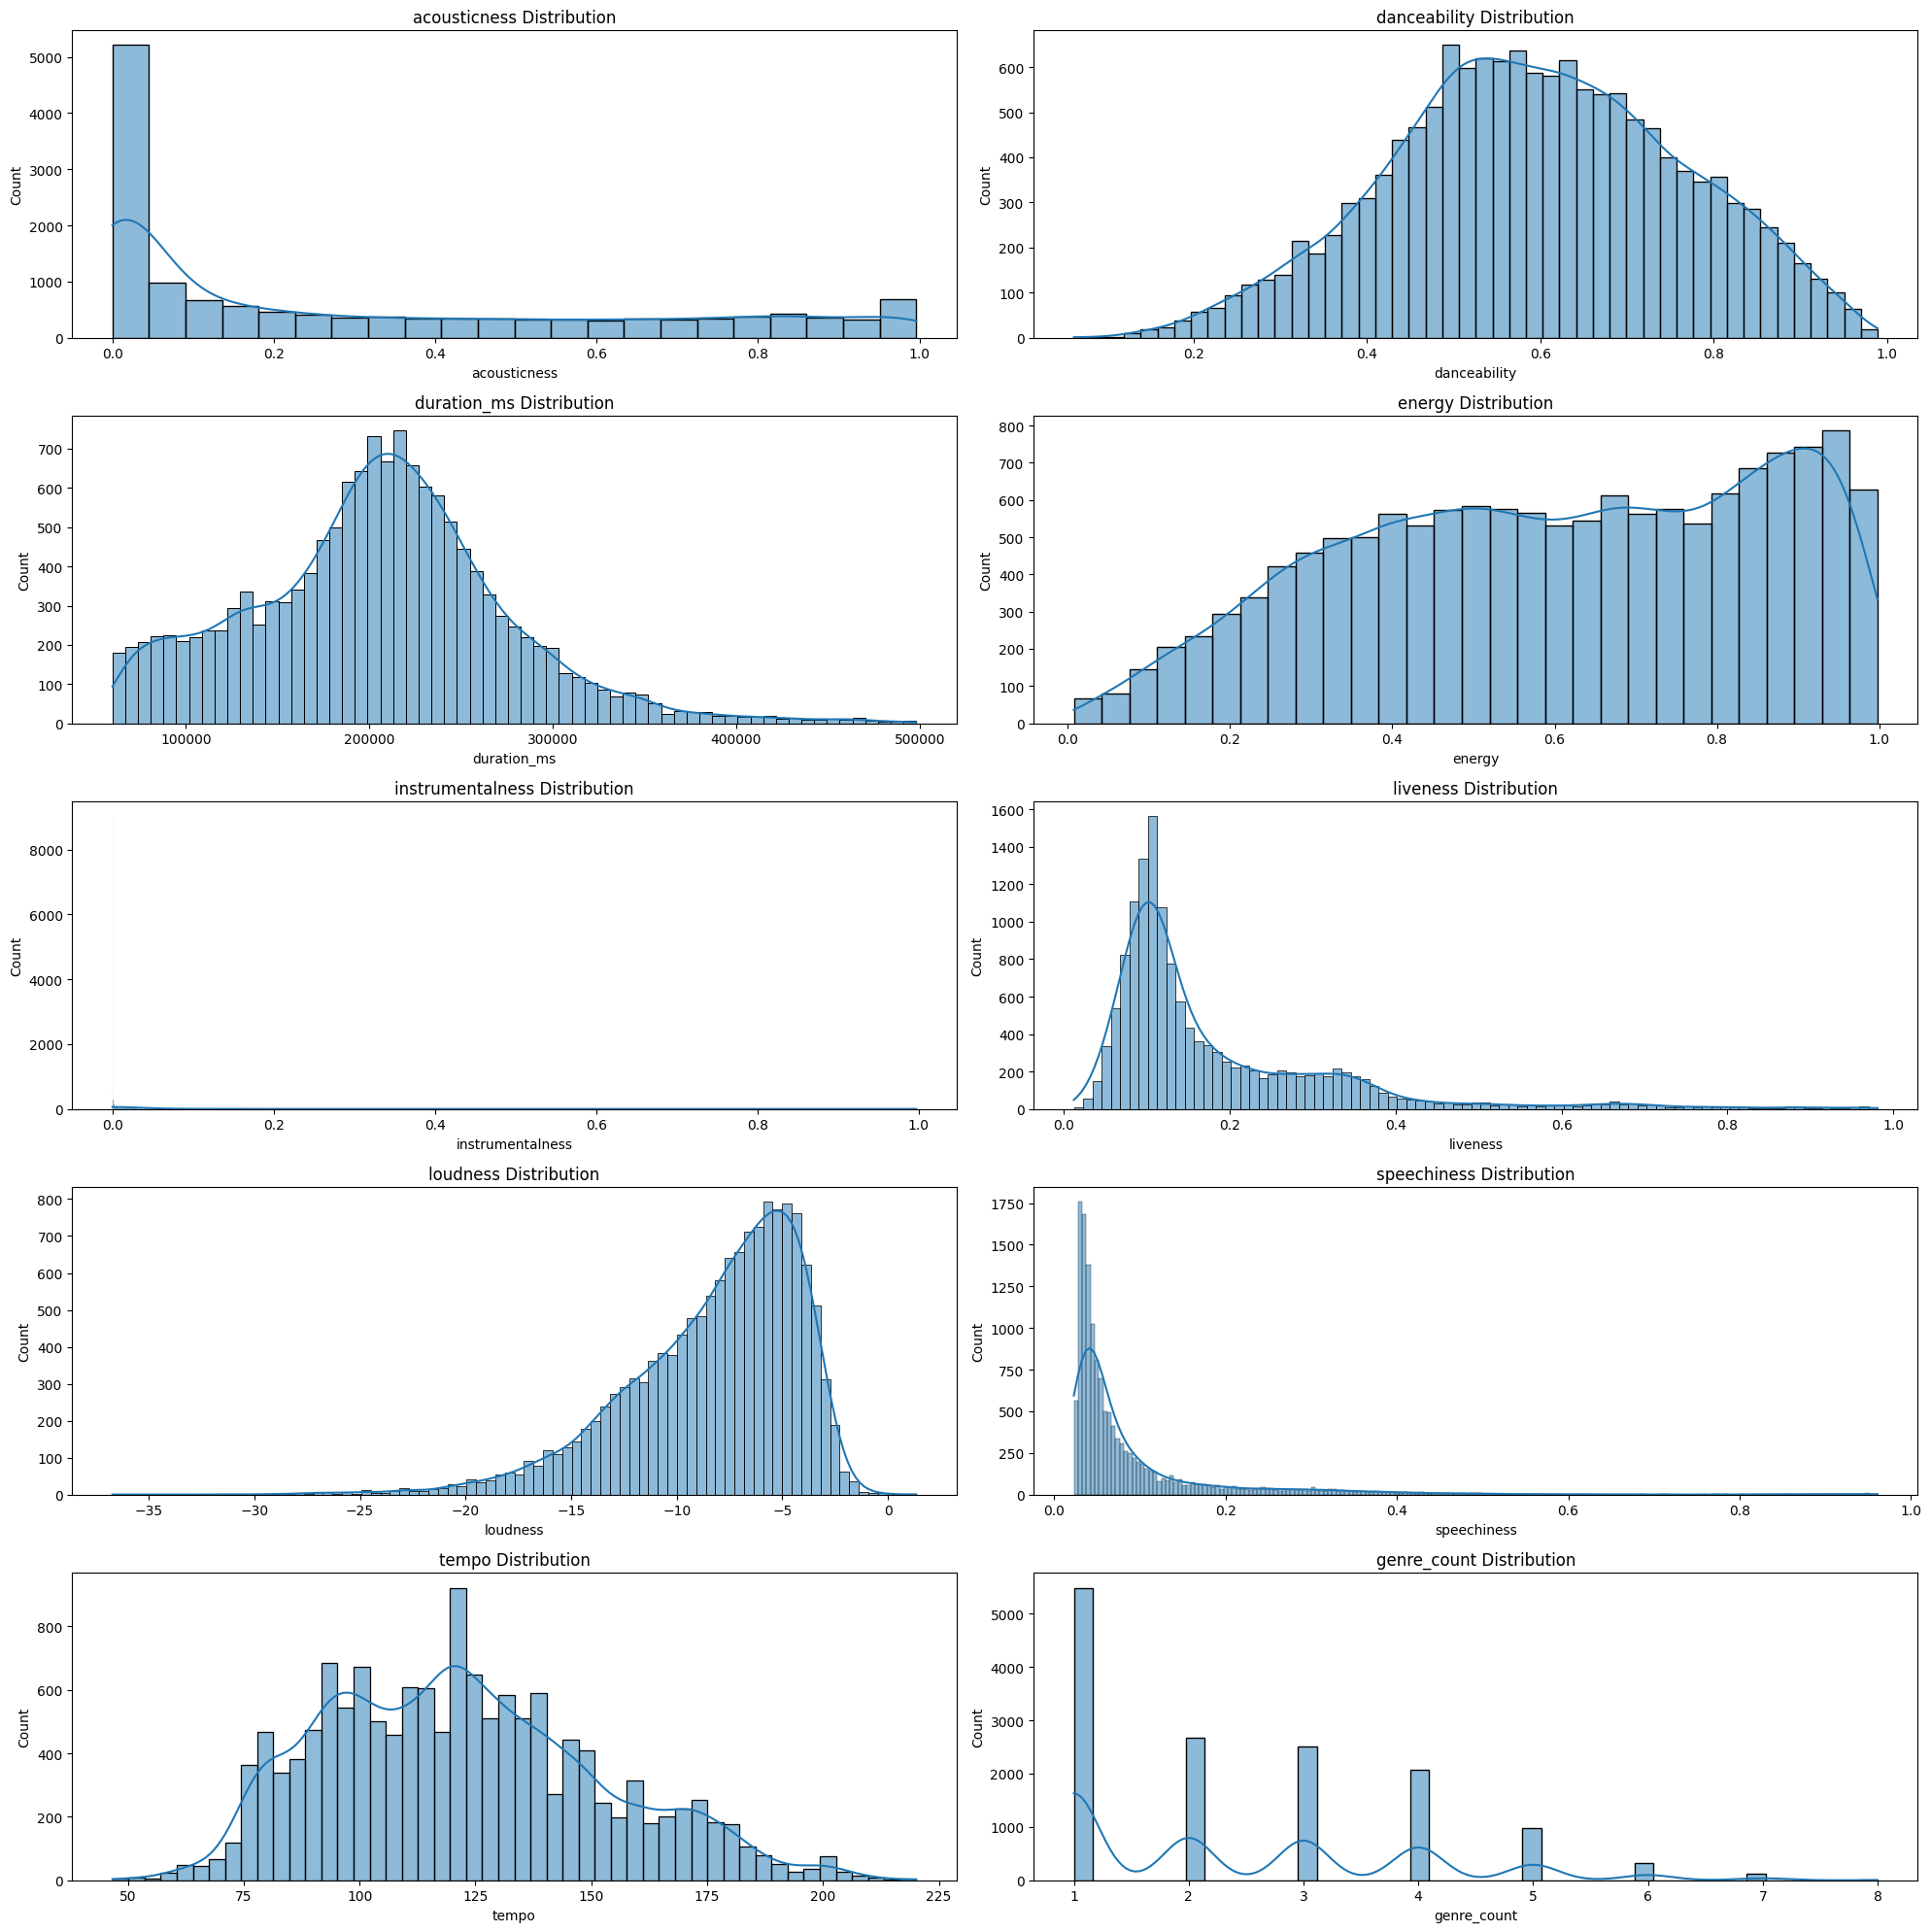

In [103]:
# Create a list of the columns to plot with audio features, duration and genre count
columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'genre_count']

# Create a figure and axis to plot on
fig, ax = plt.subplots(5, 2, figsize=(20, 20))

# Flatten the axis to make it easier to iterate over
ax = ax.flatten()

# Iterate over the columns and plot each one
for i, col in enumerate(columns):
    sns.histplot(childrens_music[col], kde=True, ax=ax[i])
    ax[i].set_title(f'{col} Distribution')

# Display the plots
plt.tight_layout()
plt.show()


In [104]:
# Dive deeper into instrumentalness
instrumentalness = childrens_music['instrumentalness']
instrumentalness.describe()

# show the most common values for instrumentalness and how many songs are above 0
instrumentalness.value_counts().head(10), childrens_music.shape[0]

(instrumentalness
 0.000000    4856
 0.000123      13
 0.000106      12
 0.000001      12
 0.000011      12
 0.000011      11
 0.001030      11
 0.000001      11
 0.862000      10
 0.160000      10
 Name: count, dtype: int64,
 14180)

### Test a model to see 
- feature importance
- current preformance

In [110]:
# Run a test to see what feature is the most important
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a new DataFrame with only the audio features and the popularity label
X = childrens_music[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
y = childrens_music['popularity_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_0 = RandomForestClassifier(n_estimators=100, random_state=42)
model_0.fit(X_train, y_train)
y_pred = model_0.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bop       0.71      0.84      0.77      1406
        flop       0.81      0.65      0.72      1430

    accuracy                           0.75      2836
   macro avg       0.76      0.75      0.75      2836
weighted avg       0.76      0.75      0.75      2836



In [112]:
feature_importances = pd.DataFrame(model_0.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("feature importances")
print(feature_importances)

feature importances
                  importance
loudness            0.175411
acousticness        0.172624
danceability        0.138263
energy              0.136684
tempo               0.101936
speechiness         0.097058
liveness            0.091097
instrumentalness    0.086927
